In [1]:
from treeano.sandbox import sensitivity_analysis
from treeano.sandbox.nodes import guided_backprop, deconvnet
import canopy

# NOTE: change this path to the path to a trained network
# with relu activations
network = canopy.serialization.unpickle_network("cifar_network")

gb_fn = sensitivity_analysis.sensitivity_analysis_fn(
    "x",
    "mean_pool",
    network,
    [
        # deconvnet.replace_relu_with_deconvnet_handler(),
        guided_backprop.replace_relu_with_guided_backprop_handler(),
    ])

loaded 49 keys (out of 49 in value dict, 49 in network)
build took 0.3777s
network_compile took 2.1572s
compile_function took 2.2127s


In [2]:
import canopy.sandbox.datasets

train, valid, test = canopy.sandbox.datasets.cifar10()

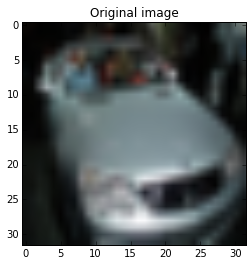

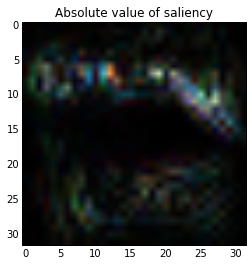

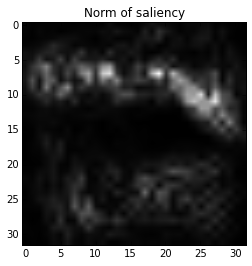

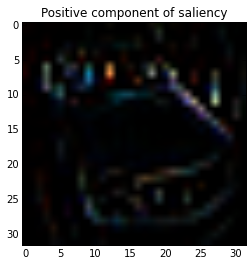

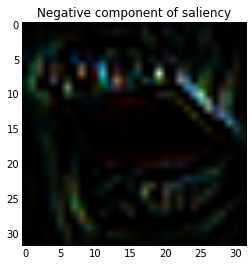

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

idx = 4
x = valid["x"]
img = x[idx].transpose(1,2,0)
hm = gb_fn(x[idx:idx+1], 0)[0].transpose(1, 2, 0)

plt.imshow(img)
plt.title("Original image")
plt.show()

plt.imshow(np.abs(hm) / np.abs(hm).max())
plt.title("Absolute value of saliency")
plt.show()

norms = np.sqrt((hm ** 2).sum(axis=2))
scaled_norms = norms / norms.max()
plt.imshow(scaled_norms, cmap="gray")
plt.title("Norm of saliency")
plt.show()

pos = np.clip(hm, 0, np.inf)
plt.imshow(pos / pos.max())
plt.title("Positive component of saliency")
plt.show()

neg = np.clip(-hm, 0, np.inf)
plt.imshow(neg / neg.max())
plt.title("Negative component of saliency")
plt.show()